In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
from datetime import datetime
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [3]:
users = pd.read_csv('/content/drive/MyDrive/ml-1m/users.dat', sep='::',engine='python',
                        names=['userid', 'gender', 'age', 'occupation', 'zip'])

ratings = pd.read_csv('/content/drive/MyDrive/ml-1m/ratings.dat', engine='python',
                          sep='::', names=['userid', 'movieid', 'rating', 'timestamp'])

movies = pd.read_csv('/content/drive/MyDrive/ml-1m/movies.dat', engine='python',
                         sep='::', names=['movieid', 'title', 'genre'], encoding='latin-1', index_col=False)

In [4]:
mintime = min(ratings.timestamp)
maxtime = max(ratings.timestamp)

In [5]:
movies_list = [movie for movie in ratings.movieid.unique() if len(ratings[ratings.movieid == movie].userid.unique()) >= 5]
ratings = ratings[ratings.movieid.isin(movies_list)]

top_users = ratings.userid.value_counts().nlargest(1000)
ratings = ratings[ratings.userid.isin(top_users.index)]

In [6]:
le_user = le_item = LabelEncoder()
le_user.fit(ratings.userid.to_numpy())
ratings.userid = le_user.transform(ratings.userid)

le_item.fit(ratings.movieid.to_numpy())
ratings.movieid = le_item.transform(ratings.movieid)

In [7]:
ratings['fav'] = ratings.rating.apply(
    lambda x: 1 if x > 3 else 0
)

In [8]:
user_list = ratings.userid.unique()
ui = {}

with open('user_item.txt', 'w') as f:
  for user in tqdm(user_list):
    movie_list = ratings[(ratings.userid == user)].movieid.unique()
    ui[user] = movie_list
    for movie in movie_list:
      f.write(f'{user}\t{movie}\n')

100%|██████████| 1000/1000 [00:01<00:00, 694.61it/s]


In [10]:
mintime = min(ratings.timestamp)
maxtime = max(ratings.timestamp)
ratings['timestamp_norm'] = ratings.timestamp.apply(
    lambda x: x - mintime
)

In [ ]:
year_time = 365 * 24 * 60 * 60
month_time = 30 * 24 * 60 * 60
week_time = 7 * 24 * 60 * 60
three_day = 3 * 24 * 60 * 60
one_day = 24 * 60 * 60

ratings['year'] = ratings.timestamp_norm.apply(
    lambda x: int(x/year_time) + 1
)
ratings['month'] = ratings.timestamp_norm.apply(
    lambda x: int(x/month_time) + 1
)
ratings['week'] = ratings.timestamp_norm.apply(
    lambda x: int(x/week_time) + 1
)
ratings['three_days'] = ratings.timestamp_norm.apply(
    lambda x: int(x/three_day) + 1
)
ratings['one_day'] = ratings.timestamp_norm.apply(
    lambda x: int(x/one_day) + 1
)

In [ ]:
movies.genre = movies.genre.apply(
    lambda x: x.split('|')
)

genres = set()
for genre_list in movies['genre']:
    genres.update(genre_list)

for genre in genres:
    movies[genre] = 0

for index, row in movies.iterrows():
    for genre in row['genre']:
        movies.at[index, genre] = 1
    for genre in genres:
        if genre not in row['genre']:
            movies.at[index, genre] = 0

# movies = movies.drop(columns=['genre'])
ratings = pd.merge(ratings, movies, how='left', left_on='movieid', right_on='movieid')

In [1]:
ratings

NameError: name 'ratings' is not defined

In [10]:
import random
bundle_dict = {}
user_bundle = {}
ub_visual = {}
buns = {}
random.seed(2024)

# def hehe(a, b):
#   for x in b:
#     if x not in a:
#       return False
#   return True

with open('bundle_item.txt', 'w') as f2, open('user_bundle_train.txt', 'w') as f3, open('user_bundle_tune.txt', 'w') as f4, open('user_bundle_test.txt', 'w') as f5:
  for user in tqdm(user_list):
    bundles = []
    # for week in new_ratings[new_ratings.useridn == user].week.unique():
    # for genre in genres:
    # bundle = ratings[(ratings.userid == user) & (ratings[f'{genre}'] == 1)].movieid.unique()
    bundle = ratings[(ratings.userid == user) & (ratings.fav == 1)].movieid.unique()
    # for r in range(3, 6):
    # bundle = movies[movies.rating == r].movieid.unique()
    bundle.sort()
    # bundle = tuple(bundle)

    if len(bundle) >= 5 and len(bundle) <= 10:
      bundle = tuple(bundle)
      if bundle not in bundle_dict:
        bundle_dict[bundle] = len(bundle_dict)
        for item in bundle:
          f2.write(f'{bundle_dict[bundle]}\t{item}\n')
      bundles.append(bundle)
    elif len(bundle) > 10:
      for i in range(0, len(bundle), 10):
        tmp_bun = tuple(bundle[i:i+10])
        if len(tmp_bun) >= 5 and tmp_bun not in bundle_dict:
          bundle_dict[tmp_bun] = len(bundle_dict)
          for item in tmp_bun:
            f2.write(f'{bundle_dict[tmp_bun]}\t{item}\n')
        bundles.append(tmp_bun)

    random.shuffle(bundles)
    user_bundle[user] = bundles
    # if len(bundles) >= 1:
    for bundle in bundles[:int(0.6*len(bundles))]:
      f3.write(f'{user}\t{bundle_dict[tuple(bundle)]}\n')

    for bundle in bundles[int(0.6*len(bundles)):int(0.8*len(bundles))]:
      f4.write(f'{user}\t{bundle_dict[tuple(bundle)]}\n')

    for bundle in bundles[int(0.8*len(bundles)):]:
      f5.write(f'{user}\t{bundle_dict[tuple(bundle)]}\n')

  0%|          | 1/1000 [00:00<00:24, 41.53it/s]


KeyError: (3186, 3204, 3230, 3269)

In [35]:
import random
from tqdm import tqdm

bundle_dict = {}
user_bundle = {}
random.seed(2024)

with open('bundle_item.txt', 'w') as f2, \
        open('user_bundle_train.txt', 'w') as f3, \
        open('user_bundle_tune.txt', 'w') as f4, \
        open('user_bundle_test.txt', 'w') as f5:

    for user in tqdm(user_list):
        bundles = []

        bundle = ratings[(ratings.userid == user) & (ratings.fav == 1)].movieid.unique()
        bundle.sort()

        if 5 <= len(bundle) <= 10:
            bundle_tuple = tuple(bundle)
            if bundle_tuple not in bundle_dict:
                bundle_dict[bundle_tuple] = len(bundle_dict)
                for item in bundle:
                  f2.write(f'{bundle_dict[bundle]}\t{item}\n')
            bundles.append(bundle_tuple)
        elif 10 < len(bundle) < 150:
            for i in range(0, len(bundle), 10):
                tmp_bun = tuple(bundle[i:i+10])
                if len(tmp_bun) >= 5 and tmp_bun not in bundle_dict:
                    bundle_dict[tmp_bun] = len(bundle_dict)
                    for item in tmp_bun:
                      f2.write(f'{bundle_dict[tmp_bun]}\t{item}\n')
                    bundles.append(tmp_bun)

        random.shuffle(bundles)
        user_bundle[user] = bundles

        train_cutoff = int(0.6 * len(bundles))
        tune_cutoff = int(0.8 * len(bundles))

        for bundle in bundles[:train_cutoff]:
            f3.write(f'{user}\t{bundle_dict[bundle]}\n')

        for bundle in bundles[train_cutoff:tune_cutoff]:
            f4.write(f'{user}\t{bundle_dict[bundle]}\n')

        for bundle in bundles[tune_cutoff:]:
            f5.write(f'{user}\t{bundle_dict[bundle]}\n')

100%|██████████| 1000/1000 [00:06<00:00, 159.41it/s]


In [36]:
len(bundle_dict)

1463

In [37]:
len(movies_list)

3416

In [38]:
# !mkdir data
import numpy as np
import pandas as pd
import scipy.sparse as sp
import torch
from sklearn.preprocessing import LabelEncoder

bi = pd.read_csv('bundle_item.txt', sep="\t", names=['b', 'i'])
ui = pd.read_csv('user_item.txt', sep="\t", names=['u', 'i'])
ub_train = pd.read_csv('user_bundle_train.txt', sep="\t", names=['u', 'b'])
ub_test = pd.read_csv('user_bundle_test.txt', sep="\t", names=['u', 'b'])
ub_valid = pd.read_csv('user_bundle_tune.txt', sep="\t", names=['u', 'b'])

num_u = ui['u'].nunique()
num_b = bi['b'].nunique()
num_i = bi['i'].nunique()
num_iu = ui['i'].nunique()
bi_idx = bi.to_numpy()
bi_graph = torch.sparse_coo_tensor(
    indices=torch.tensor([bi_idx[:, 0], bi_idx[:, 1]]),
    values=np.ones(len(bi)),
    size=(num_b, num_iu),
)
intersect = bi_graph @ bi_graph.T
mask = torch.eye(num_b)

total_item = bi_graph.sum(dim=1)
total_item = total_item.to_dense()
total_item_a = total_item.view(-1, 1)
total_item_b = total_item.view(1, -1)

total_overlap = total_item_a + total_item_b
inter_non_eye = intersect - intersect * mask
total_overlap_non_eye = total_overlap - total_overlap * mask + mask
total_not_overlap = total_overlap_non_eye - inter_non_eye
jaccard_pair_bundle = inter_non_eye.to_dense() / total_not_overlap
eli = (jaccard_pair_bundle >= 0.5).nonzero()
eli_unique = eli[:, 0].unique()
ub = pd.concat([ub_train, ub_test, ub_valid])
bi_fil = bi[~bi['b'].isin(eli_unique.tolist())]
ub_train_fil = ub_train[~ub_train['b'].isin(eli_unique.tolist())]
ub_test_fil = ub_test[~ub_test['b'].isin(eli_unique.tolist())]
ub_valid_fil = ub_valid[~ub_valid['b'].isin(eli_unique.tolist())]
ub_all  = pd.concat([ub_train_fil, ub_test_fil, ub_valid_fil])
ub_all = ub_all.sample(frac=1)
train_idx = int(len(ub_all) * 0.7)
valid_idx = int(len(ub_all) * 0.8)
ub_train_fil = ub_all[:train_idx]
ub_valid_fil = ub_all[train_idx:valid_idx]
ub_test_fil = ub_all[valid_idx:]
ub_train_fil.to_csv("data/user_bundle_train.txt", sep="\t", index=False, header=False)
ub_test_fil.to_csv("data/user_bundle_test.txt", sep="\t", index=False, header=False)
ub_valid_fil.to_csv("data/user_bundle_valid.txt", sep="\t", index=False, header=False)
bi_fil.to_csv("data/bundle_item.txt", sep="\t", index=False, header=False)

In [39]:
len(eli_unique)

45

In [42]:
import torch
def get_jaccard(pred, grd):
    # pred = pred.to(grd.device)
    intersect = intersect = torch.matmul(pred, grd.T)
    total_a = torch.sum(pred, dim=1).view(-1, 1)
    total_b = torch.sum(grd, dim=1).view(1, -1)
    total_overlap = total_a + total_b
    total = total_overlap - intersect
    cnt = pred.shape[0] - (grd.sum(dim=1) == 0).sum().item()

    return torch.mean(intersect / total) / cnt

a = torch.tensor([[1,0,1], [0,1,1]])
b = torch.tensor([[1,1,0], [1,1,1]])
get_jaccard(a, b)

tensor(0.2500)

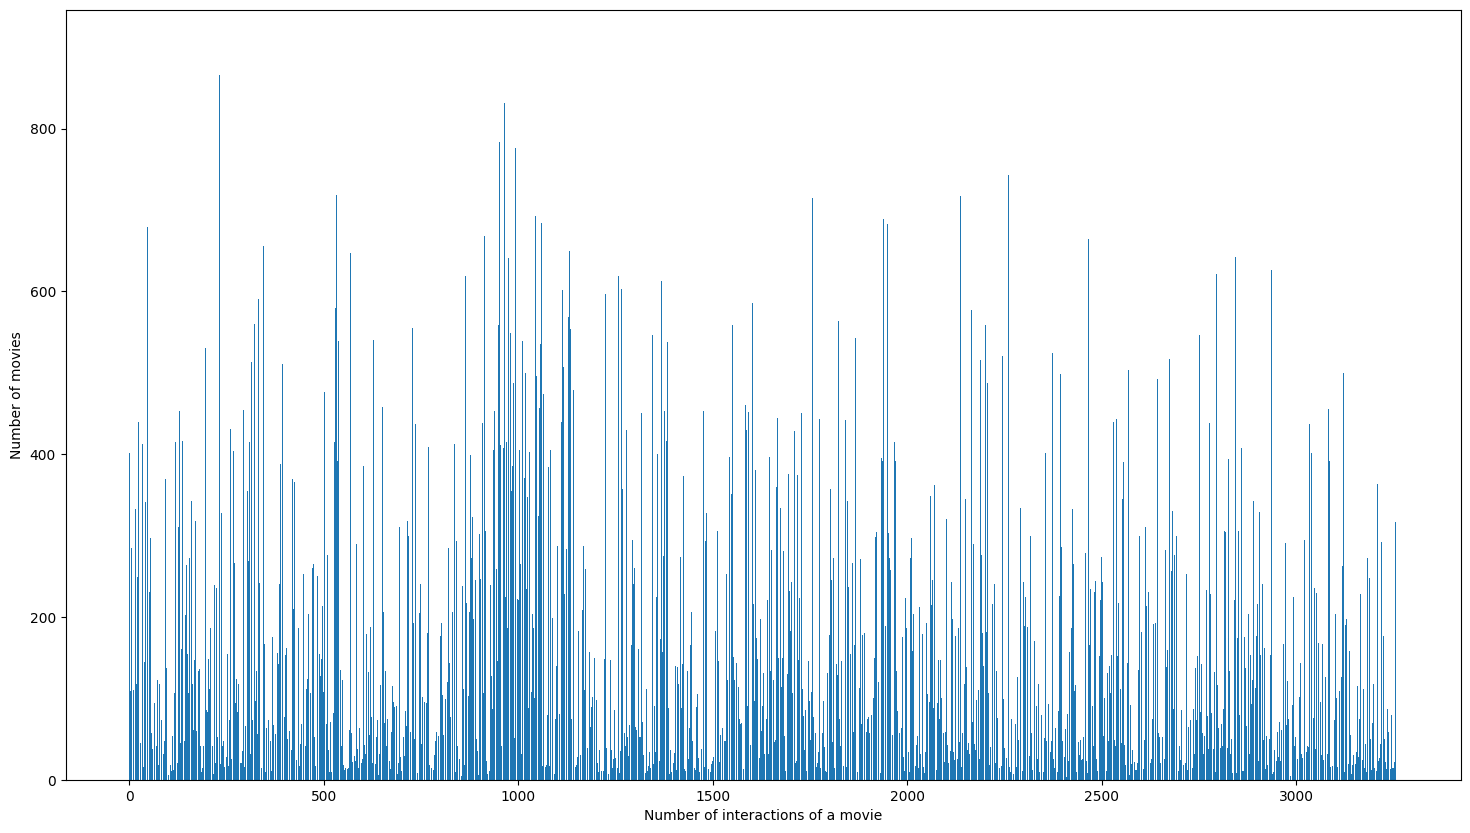

In [ ]:
ui_ = {item: 0 for item in ratings.movieidn.unique()}
for item in ratings.movieidn.unique():
  for user in user_list:
    if item in ui[user]:
      ui_[item] += 1

plt.figure(figsize=(18, 10))
plt.bar(ui_.keys(), ui_.values())
plt.xlabel('Number of interactions of a movie')
plt.ylabel('Number of movies')
plt.show()

In [ ]:
min(ui_.values())

2

In [ ]:
ui_dict = {}
for user, item in ui.items():
  if len(item) not in ui_dict:
    ui_dict[len(item)] = 0
  else:
    ui_dict[len(item)] += 1

plt.figure(figsize=(18, 10))
plt.bar(ui_dict.keys(), ui_dict.values())
plt.xlabel('Number of movies that an user watched')
plt.ylabel('Number of users')
plt.show()

In [ ]:
bi_dict = {}

for b, idx in bundle_dict.items():
  if len(b) not in bi_dict:
    bi_dict[len(b)] = 0
  else:
    bi_dict[len(b)] += 1

plt.figure(figsize=(18, 10))
plt.bar(bi_dict.keys(), bi_dict.values())
plt.xlabel('Number of items in a bundle')
plt.ylabel('Number of bundles')
plt.show()

In [ ]:
ub_dict = {}
for u, b in user_bundle.items():
  if len(b) not in ub_dict:
    ub_dict[len(b)] = 1
  else:
    ub_dict[len(b)] += 1

plt.figure(figsize=(18, 10))
plt.bar(ub_dict.keys(), ub_dict.values())
plt.xlabel('Number of bundles an user watched')
plt.ylabel('Number of users')
plt.show()

In [ ]:
bu_dict = {}

for b, idx in bundle_dict.items():
  for user in user_list:
    if idx not in user_bundle[user]:
      bu_dict[idx] = 1
    else:
      bu_dict[idx] += 1

bun_interact = {}
for bun, cnt in bu_dict.items():
  if cnt not in bun_interact:
    bun_interact[cnt] = 1
  else:
    bun_interact[cnt] += 1

plt.figure(figsize=(18, 10))
plt.bar(bun_interact.keys(), bun_interact.values())
plt.xlabel('Number of times a bundle has been watched')
plt.ylabel('Number of bundles')
plt.show()

In [ ]:
bun_interact

{1: 8275}

In [ ]:
# norm = movies.movieid_norm.unique()
# with open('/content/drive/MyDrive/ml-1m/movieid_lookup.txt', 'w') as f:
#   for id in tqdm(norm):
#     f.write(f'{id}\t{movies[movies.movieid_norm==id].movieid}\n')


100%|██████████| 3883/3883 [00:02<00:00, 1456.79it/s]
